In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:

data = pd.read_csv("cleaned_data.csv")
data

Country  Year  Young Age Dependency Ratio   
0     Afghanistan  2016                   87.405774  \
1     Afghanistan  2015                   88.398202   
2     Afghanistan  2014                   90.015900   
3     Afghanistan  2013                   92.388046   
4     Afghanistan  2012                   94.533123   
...           ...   ...                         ...   
7122     Zimbabwe  1979                  108.320784   
7123     Zimbabwe  1978                  105.613450   
7124     Zimbabwe  1977                  103.098512   
7125     Zimbabwe  1976                  101.949515   
7126     Zimbabwe  1975                  101.330144   

      Retirement Age Dependency Ratio                 SDG Region  Population   
0                            4.606351  Central and Southern Asia    34636207  \
1                            4.644246  Central and Southern Asia    33753499   
2                            4.690797  Central and Southern Asia    32716210   
3                            4.737487  Central and Southern Asia    31541209   
4                            4.767237  Central and Southern Asia    30466479   
...                               ...                        ...         ...   
7122                         7.461233         Sub-Saharan Africa     6655833   
7123                         7.032998         Sub-Saharan Africa     6549349   
7124                         6.695480         Sub-Saharan Africa     6453044   
7125                         6.566900         Sub-Saharan Africa     6288387   
7126                         6.517293         Sub-Saharan Africa     6097083   

      Male Population Ratio  Urban Population Ratio  Total Area (sq km)   
0                 50.585392                  25.020            652860.0  \
1                 50.576819                  24.803            652860.0   
2                 50.567865                  24.587            652860.0   
3                 50.557897                  24.373            652860.0   
4                 50.544420                  24.160            652860.0   
...                     ...                     ...                 ...   
7122              46.870076                  21.853            390760.0   
7123              47.536053                  21.345            390760.0   
7124              48.270599                  20.846            390760.0   
7125              48.593463                  20.356            390760.0   
7126              48.736732                  19.873            390760.0   

      GDP_per_Capita  Life Expectancy  Infant mortality per 1000 live births   
0         523.053012           63.136                                54.4866  \
1         566.881130           62.659                                56.1285   
2         626.512929           62.545                                57.4750   
3         638.733181           62.417                                58.7879   
4         653.417475           61.923                                60.7803   
...              ...              ...                                    ...   
7122      777.883009           55.038                                69.8009   
7123      664.432526           54.593                                70.5353   
7124      676.329202           56.285                                71.0838   
7125      686.721730           56.936                                71.3479   
7126      716.949515           57.552                                71.4789   

       BMI  BMI Female  BMI Male  
0     23.4        24.1      22.6  
1     23.3        24.0      22.5  
2     23.2        23.9      22.4  
3     23.0        23.7      22.3  
4     22.9        23.6      22.3  
...    ...         ...       ...  
7122  22.3        24.0      20.5  
7123  22.2        23.9      20.4  
7124  22.1        23.9      20.3  
7125  22.1        23.8      20.2  
7126  22.0        23.8      20.1  

[7127 rows x 15 columns]

In [3]:
data = data.sort_values(by=['Country', 'Year'])
data['Population Growth (%)'] = data.groupby('Country')['Population'].pct_change() * 100
data['Population Growth (%)'] = data.groupby('Country')['Population Growth (%)'].shift(-1)

In [4]:
data["Population Density"] = data['Population'] / data["Total Area (sq km)"]


In [5]:
data.columns

Index(['Country', 'Year', 'Young Age Dependency Ratio',
       'Retirement Age Dependency Ratio', 'SDG Region', 'Population',
       'Male Population Ratio', 'Urban Population Ratio', 'Total Area (sq km)',
       'GDP_per_Capita', 'Life Expectancy',
       'Infant mortality per 1000 live births', 'BMI', 'BMI Female',
       'BMI Male', 'Population Growth (%)', 'Population Density'],
      dtype='object')

In [6]:
def random_countries(x,y='Year'):
    random_countries = random.sample(list(data['Country'].unique()), 4)

    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    for i, country in enumerate(random_countries):
        ax = axes[i // 2, i % 2] 
        country_data = data[data['Country'] == country]
        ax.scatter(country_data[y], country_data[x], color='blue', marker='o')
        ax.set_title(f'{x} vs {y}\n({country})')
        ax.set_xlabel(y)
        ax.set_ylabel(x)
    plt.tight_layout()
    plt.show() 

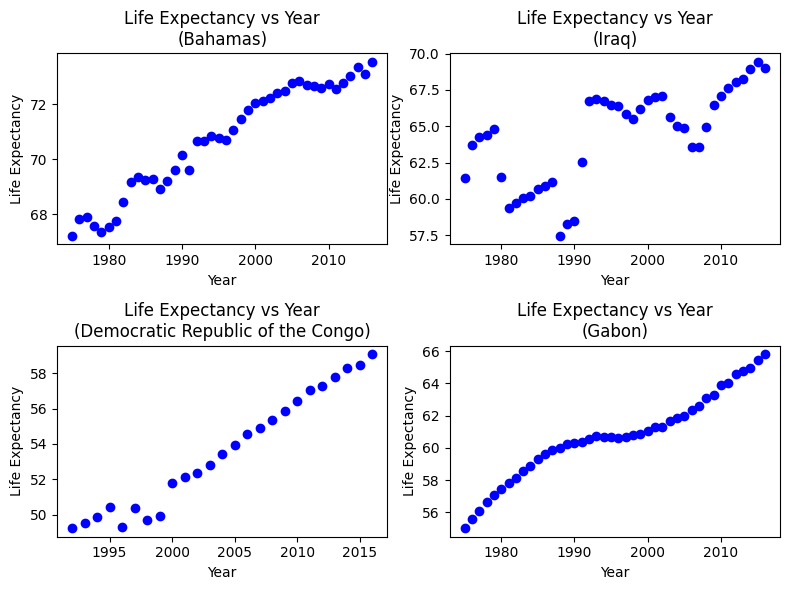

In [7]:
random_countries('Life Expectancy')

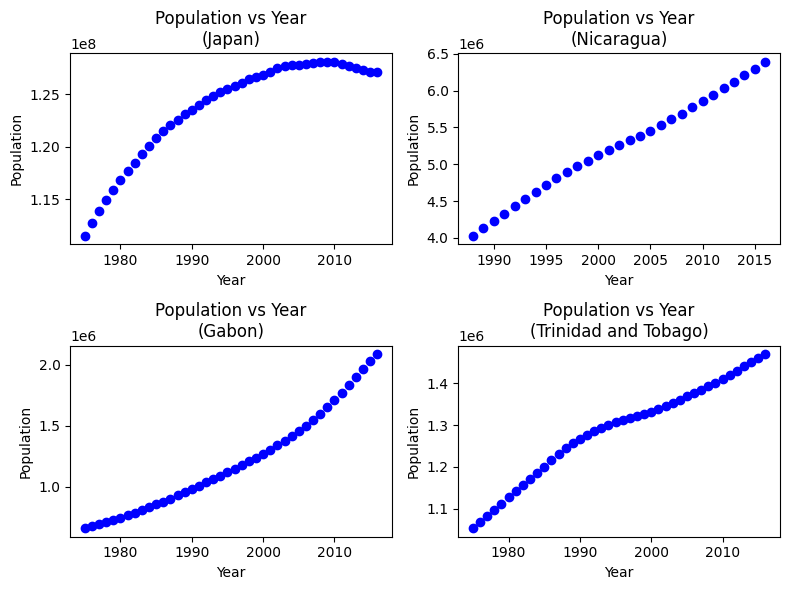

In [8]:
random_countries("Population")

In [9]:
def find_extreme_row(column_name, extreme='max'):
    if extreme == 'max':
        extreme_value = data[column_name].max()
    elif extreme == 'min':
        extreme_value = data[column_name].min()
    extreme_rows = data[data[column_name] == extreme_value]
    print(f"Row(s) with the {extreme} {column_name}:")
    print(extreme_rows)
    return extreme_rows

In [10]:
def plot_scatter(col_x, col_y = "Life Expectancy",reduce_factor = None,country = None,lower_percentile = 0, upper_percentile = 1,regression = False):
    if lower_percentile>1:
        lower_percentile/=100
    if upper_percentile>1:
        upper_percentile/=100
    data_frame = data
    if reduce_factor:
        if reduce_factor > 1000:
            data_frame = data_frame[data_frame['Year'] == reduce_factor]
        else:
            data_frame = data_frame[data_frame['Year'] % reduce_factor == 0]
    if country:
        data_frame = data_frame[data_frame['Country or Area'] == country]
    if lower_percentile == 0:
        lower_bound = data_frame[col_x].min()
    else:
        lower_bound = data_frame[col_x].quantile(lower_percentile)
    if upper_percentile == 1:
        upper_bound = data_frame[col_x].max()
    else:
        upper_bound = data_frame[col_x].quantile(upper_percentile)
    data_frame = data_frame[(data_frame[col_x] >= lower_bound) & (data_frame[col_x] <= upper_bound)]
    if regression:
        sns.set_style('whitegrid')
        sns.lmplot(x = col_x, y = col_y, data=data_frame,line_kws={'color': 'orange'})
    else:
        plt.scatter(data_frame[col_x], data_frame[col_y], color='blue', marker='o')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    title = f'{col_y} vs {col_x}\n {round(lower_percentile *100)} - {round(upper_percentile*100)} percentile'
    if country:
        title += f"\n{country}"
    plt.title(title)
    plt.show()

### Compare to life expectancy


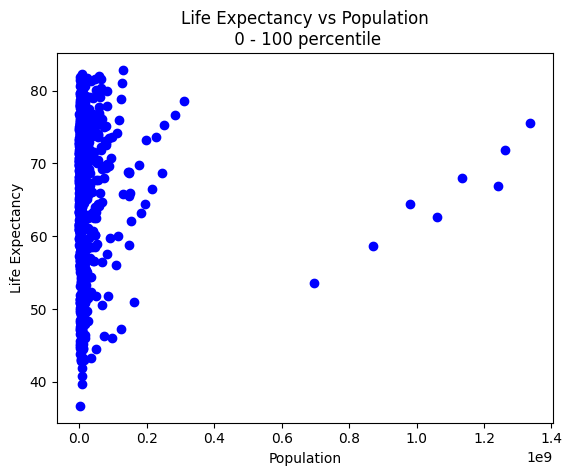

In [11]:
plot_scatter('Population',reduce_factor=10)

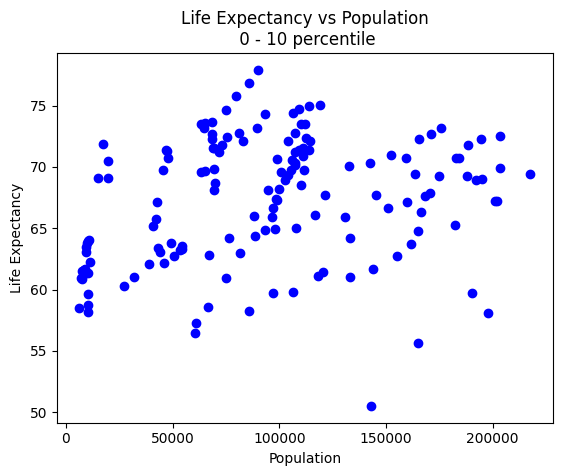

In [12]:
plot_scatter('Population',reduce_factor=5,upper_percentile=0.1)

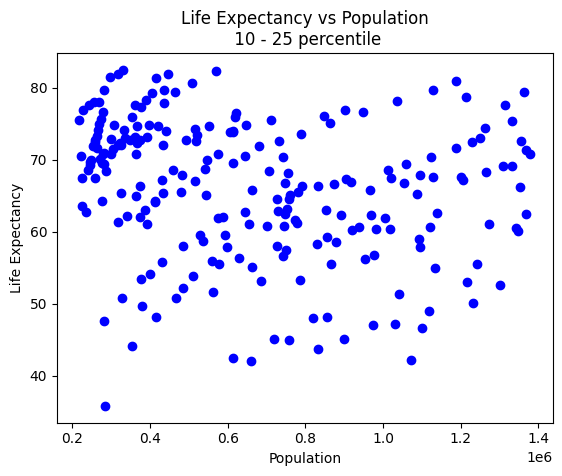

In [13]:
plot_scatter('Population',reduce_factor=5,lower_percentile=0.1,upper_percentile=0.25)

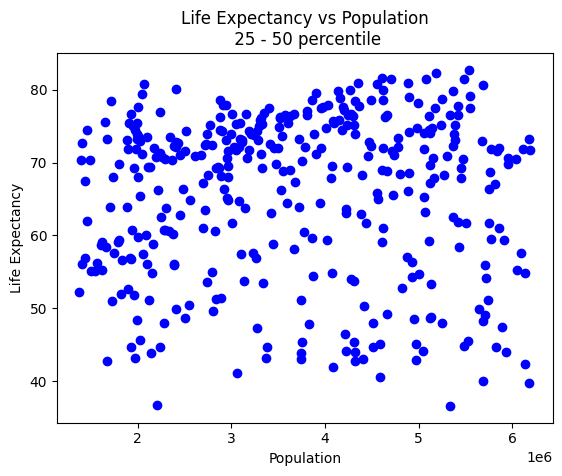

In [14]:
plot_scatter('Population',reduce_factor=5,lower_percentile=0.25,upper_percentile=0.5)

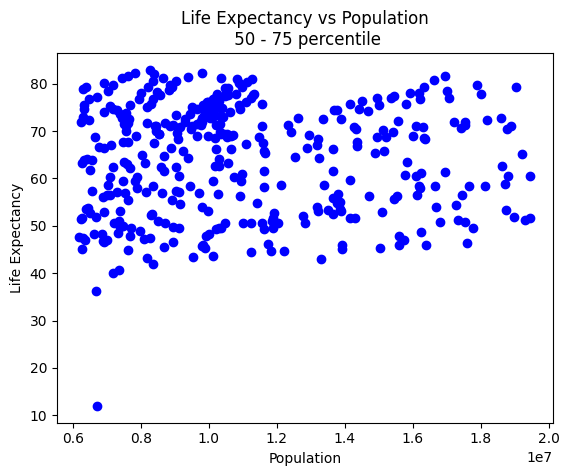

In [15]:
plot_scatter('Population',reduce_factor=5,lower_percentile=0.5,upper_percentile=0.75)

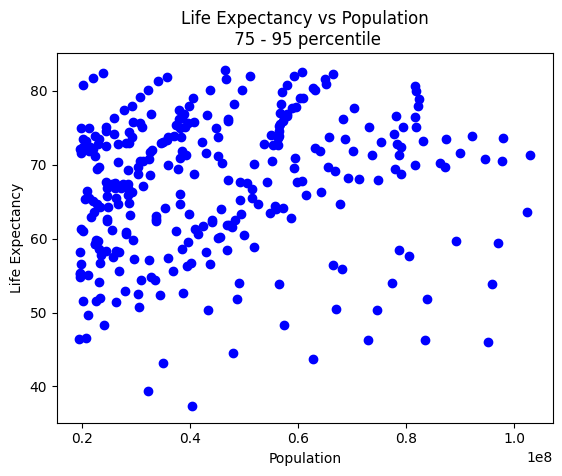

In [16]:
plot_scatter('Population',reduce_factor=5,lower_percentile=0.75,upper_percentile=0.95)

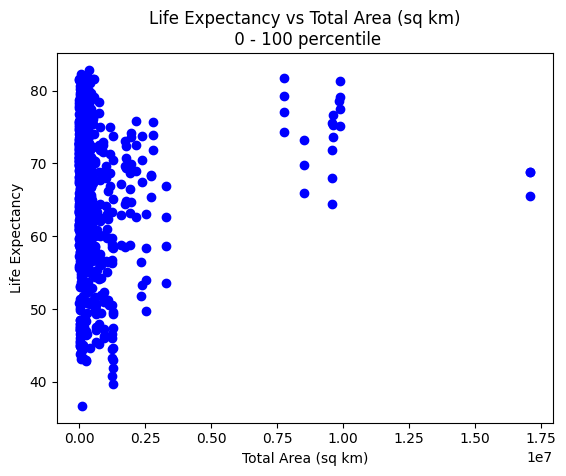

In [17]:
plot_scatter("Total Area (sq km)",reduce_factor=10)

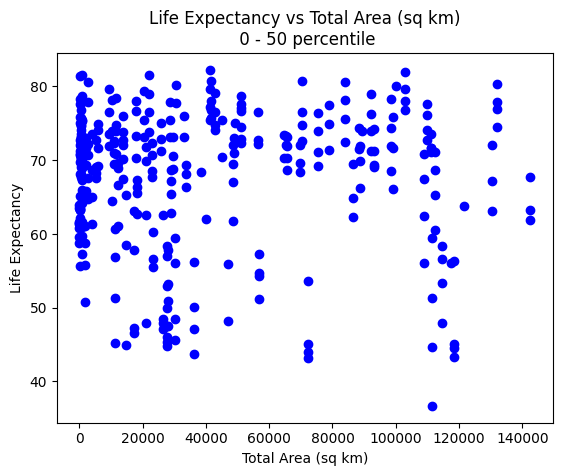

In [18]:
plot_scatter("Total Area (sq km)",reduce_factor=10,upper_percentile=0.5)

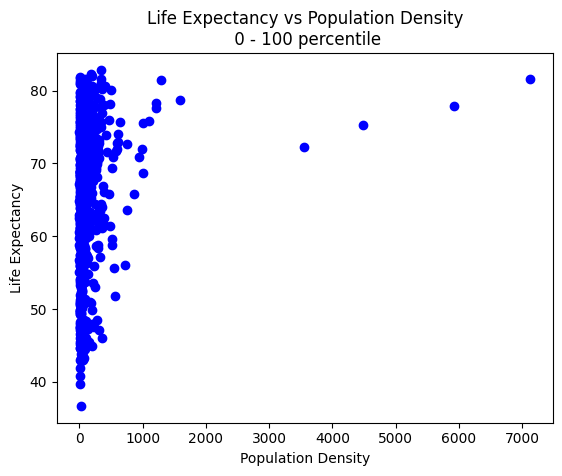

In [19]:
plot_scatter("Population Density",reduce_factor=10)

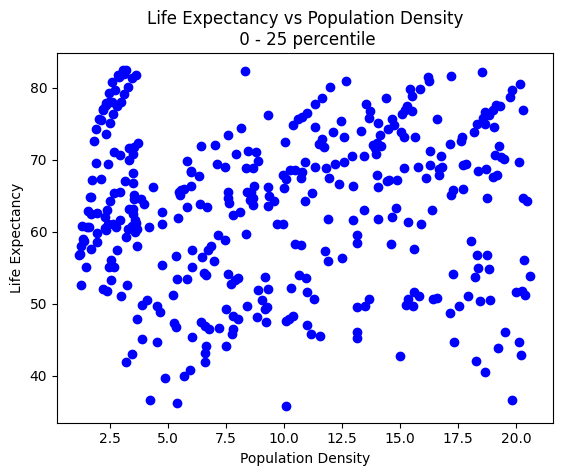

In [20]:
plot_scatter("Population Density",reduce_factor=5,lower_percentile=0,upper_percentile=0.25)

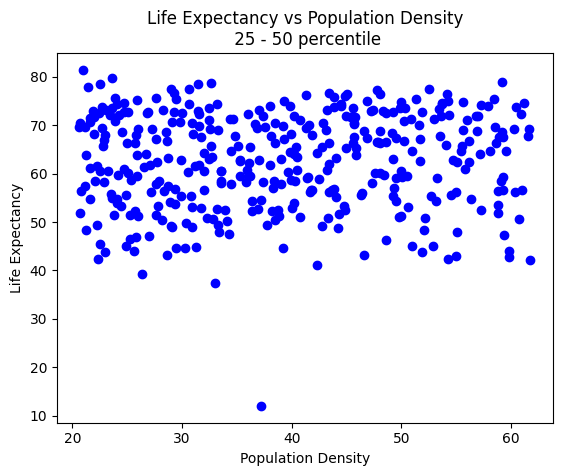

In [21]:
plot_scatter("Population Density",reduce_factor=5,lower_percentile=0.25,upper_percentile=0.5)

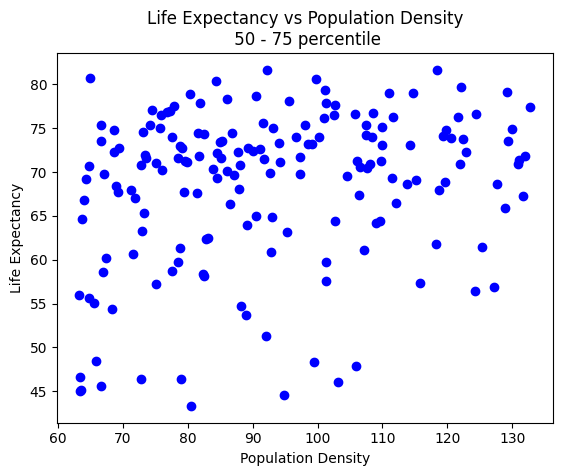

In [22]:
plot_scatter("Population Density",reduce_factor=10,lower_percentile=0.5,upper_percentile=0.75)

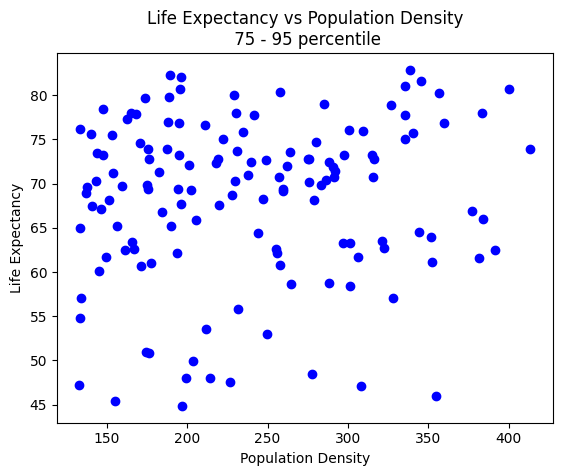

In [23]:
plot_scatter("Population Density",reduce_factor=10,lower_percentile=0.75,upper_percentile=0.95)

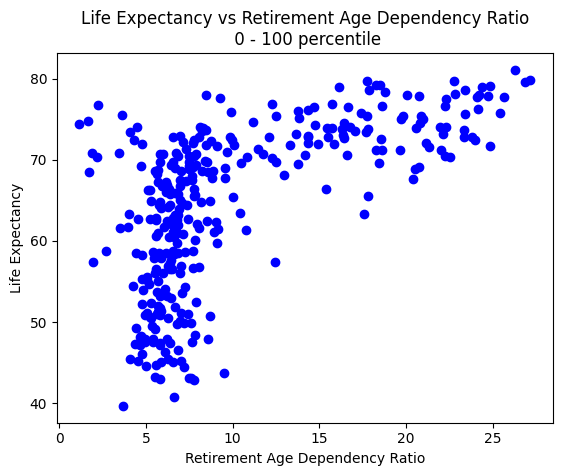

In [24]:
plot_scatter("Retirement Age Dependency Ratio",reduce_factor= 20)

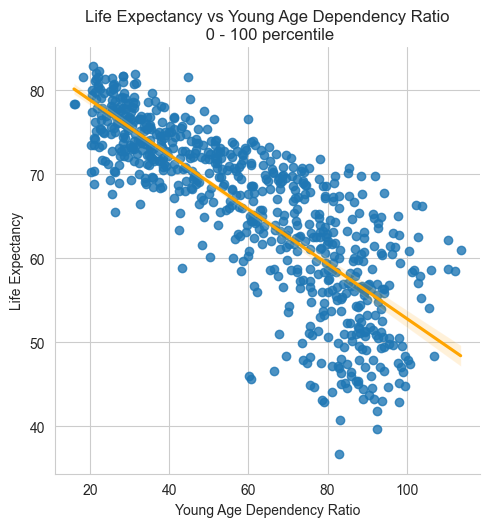

In [25]:
plot_scatter('Young Age Dependency Ratio',reduce_factor=10,regression=True)

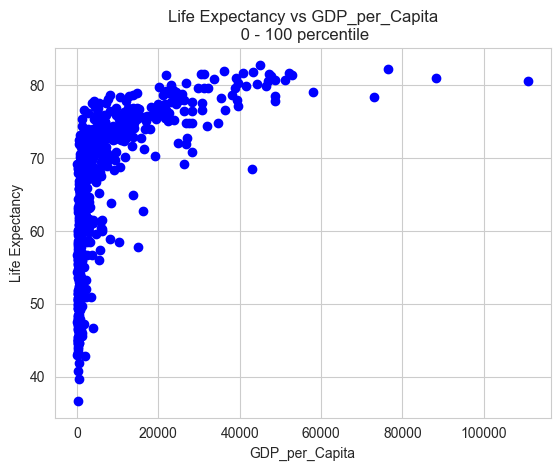

In [26]:
plot_scatter('GDP_per_Capita',reduce_factor=10)

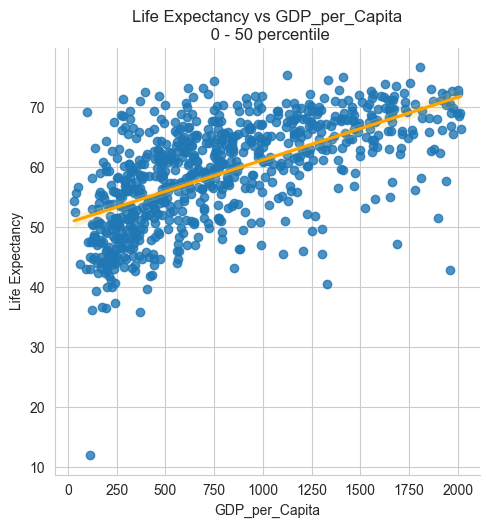

In [27]:
plot_scatter('GDP_per_Capita',reduce_factor=5,upper_percentile=0.5,regression=True)

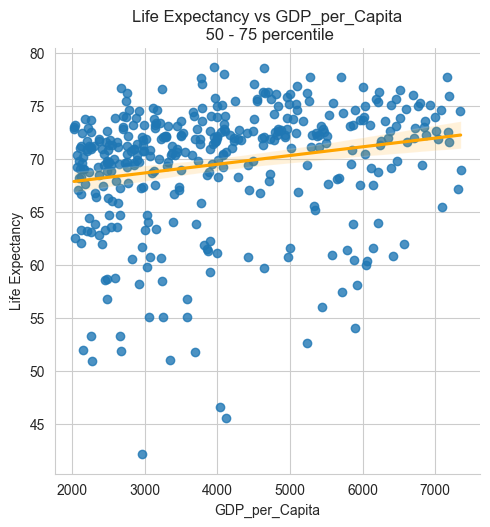

In [28]:
plot_scatter('GDP_per_Capita',reduce_factor=5,lower_percentile=0.5,upper_percentile=0.75,regression=True)

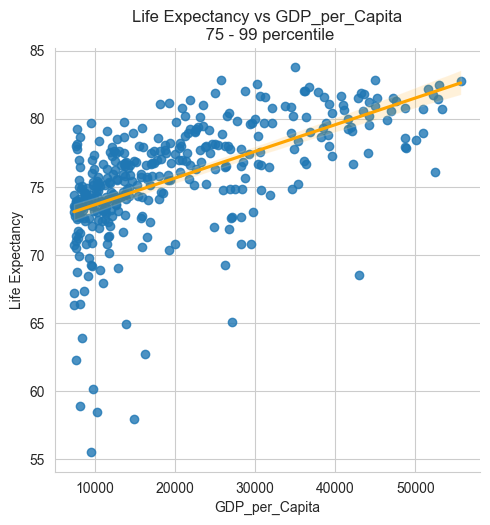

In [29]:
plot_scatter('GDP_per_Capita',reduce_factor=5,lower_percentile=0.75,upper_percentile=0.99,regression=True)

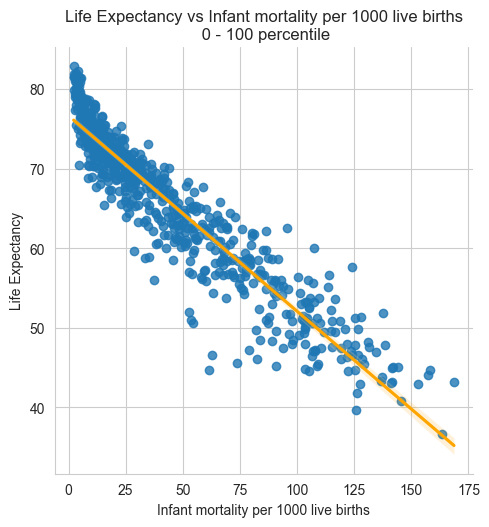

In [30]:
plot_scatter('Infant mortality per 1000 live births',reduce_factor=10,regression=True)

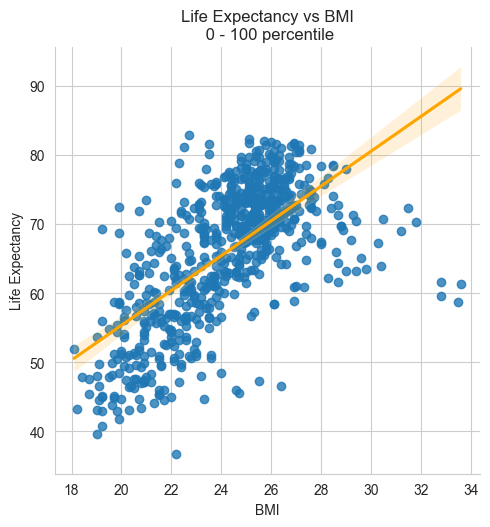

In [31]:
plot_scatter('BMI',reduce_factor=10,regression=True)

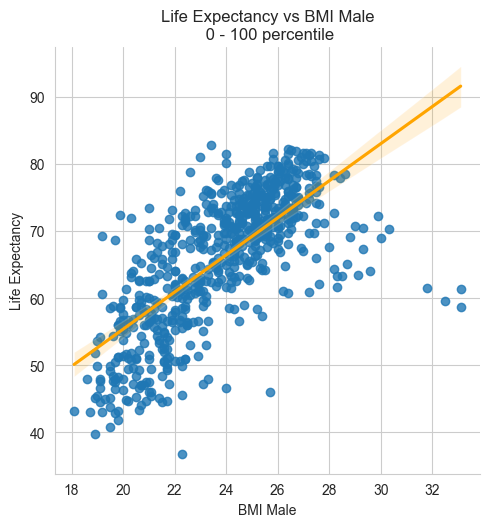

In [32]:
plot_scatter('BMI Male',reduce_factor=10,regression=True)

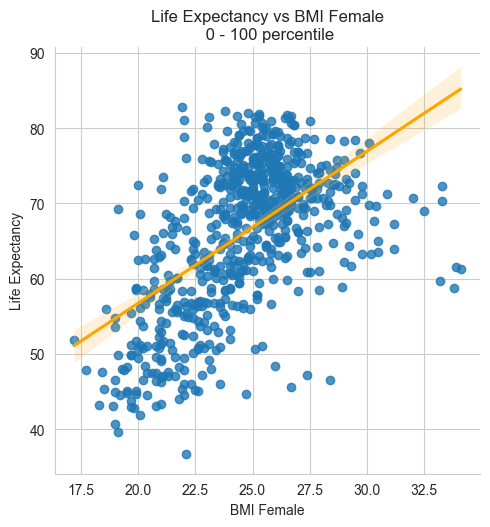

In [33]:
plot_scatter('BMI Female',reduce_factor=10,regression=True)

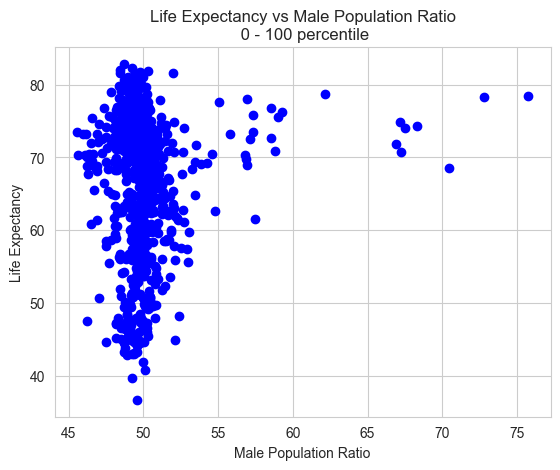

In [34]:
plot_scatter('Male Population Ratio',reduce_factor=10)

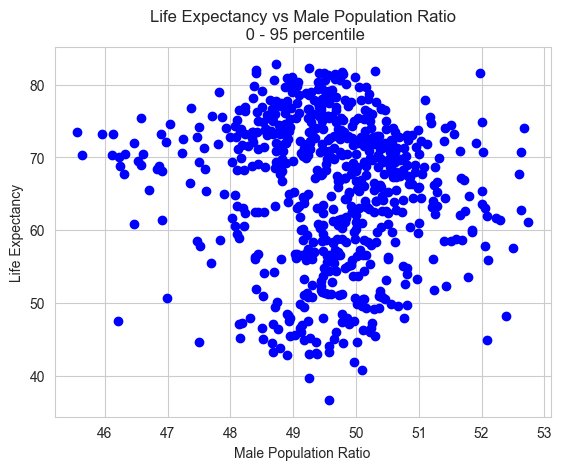

In [35]:
plot_scatter('Male Population Ratio',reduce_factor=10,upper_percentile=95)

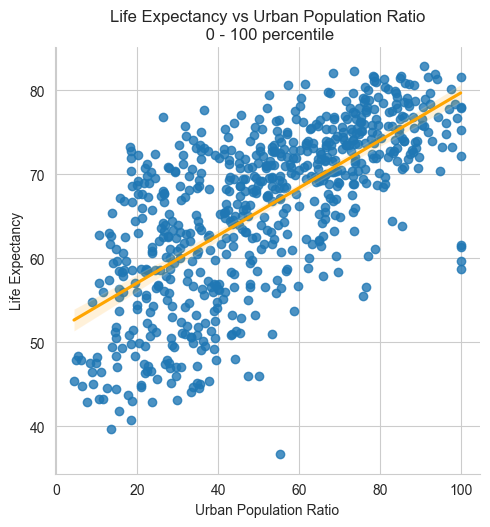

In [36]:
plot_scatter('Urban Population Ratio',reduce_factor=10,regression=True)

Compare to population growth

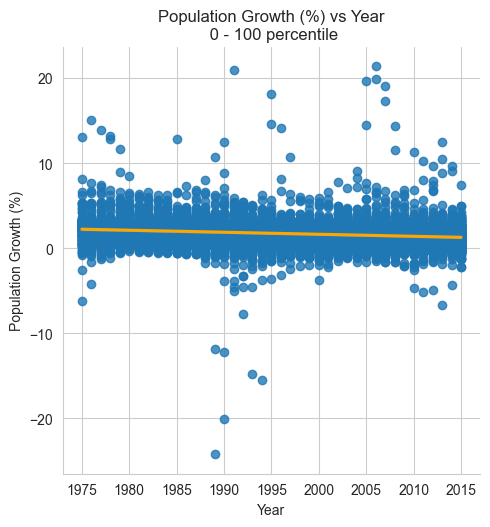

In [37]:
plot_scatter("Year",'Population Growth (%)',regression=True)

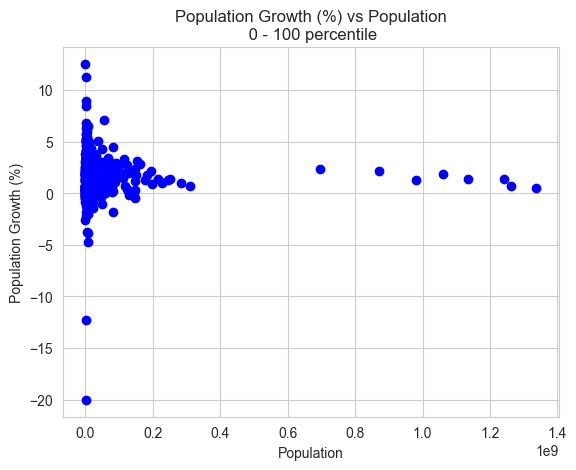

In [38]:
plot_scatter('Population','Population Growth (%)',reduce_factor=10)

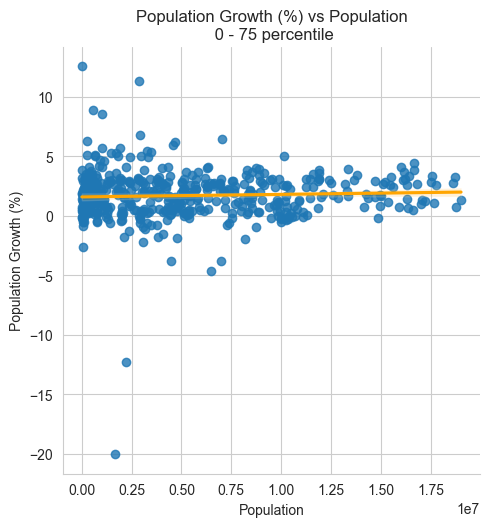

In [39]:
plot_scatter('Population','Population Growth (%)',reduce_factor=10,upper_percentile=75,regression=True)

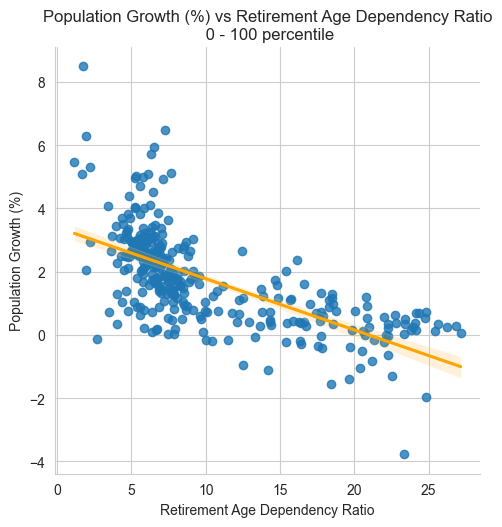

In [40]:
plot_scatter('Retirement Age Dependency Ratio','Population Growth (%)',reduce_factor=20,regression=True)

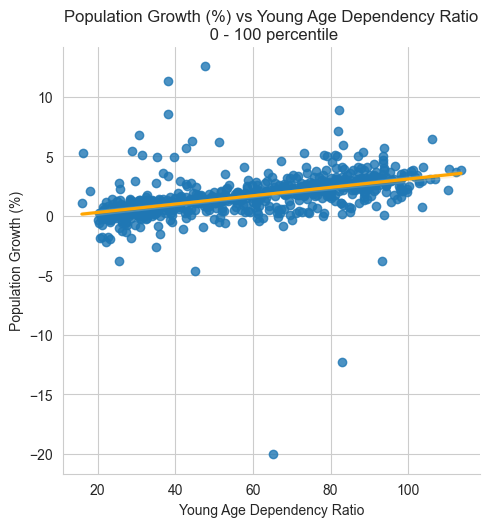

In [41]:
plot_scatter('Young Age Dependency Ratio','Population Growth (%)',reduce_factor=10,regression=True)

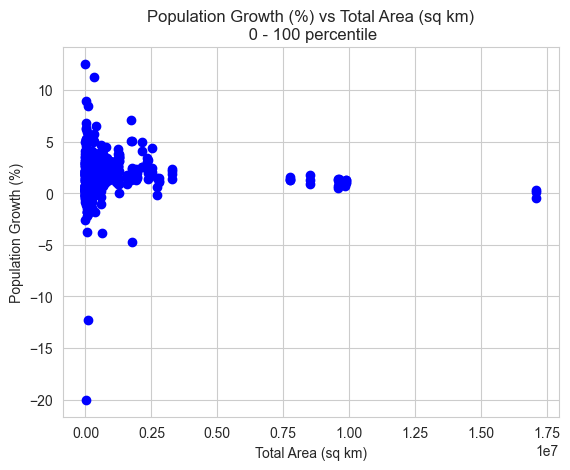

In [42]:
plot_scatter('Total Area (sq km)','Population Growth (%)',reduce_factor=10)

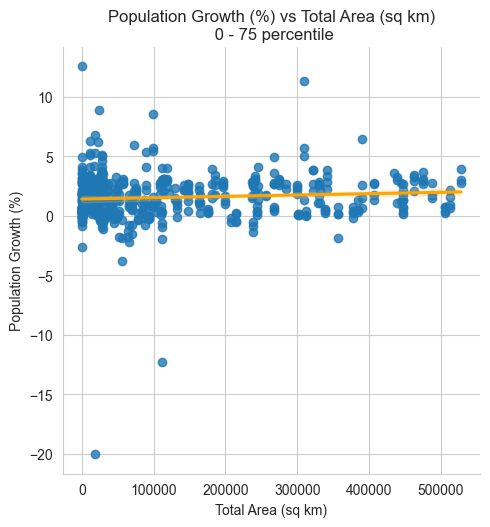

In [43]:
plot_scatter('Total Area (sq km)','Population Growth (%)',reduce_factor=10,upper_percentile=75,regression=True)

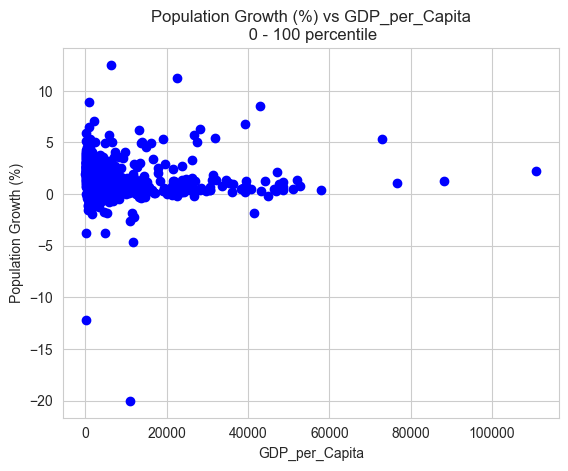

In [44]:
plot_scatter('GDP_per_Capita','Population Growth (%)',reduce_factor=10)

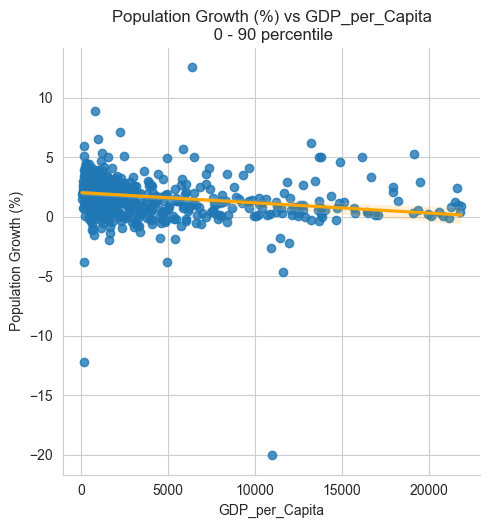

In [45]:
plot_scatter('GDP_per_Capita','Population Growth (%)',reduce_factor=10,upper_percentile=90, regression=True)

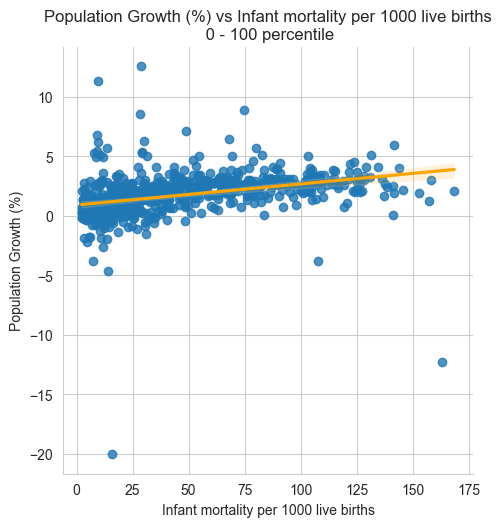

In [46]:
plot_scatter('Infant mortality per 1000 live births','Population Growth (%)',reduce_factor=10,regression=True)

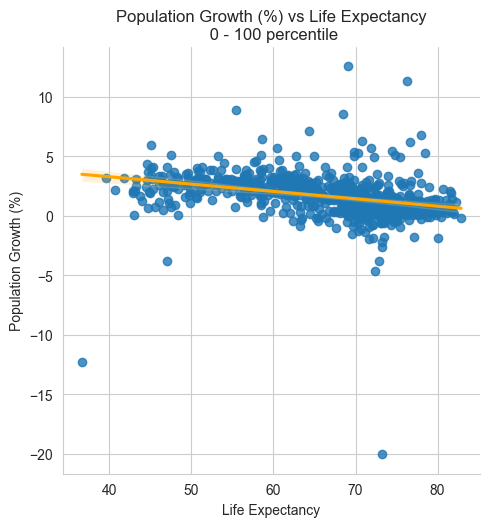

In [47]:
plot_scatter('Life Expectancy','Population Growth (%)',reduce_factor=10,regression=True)

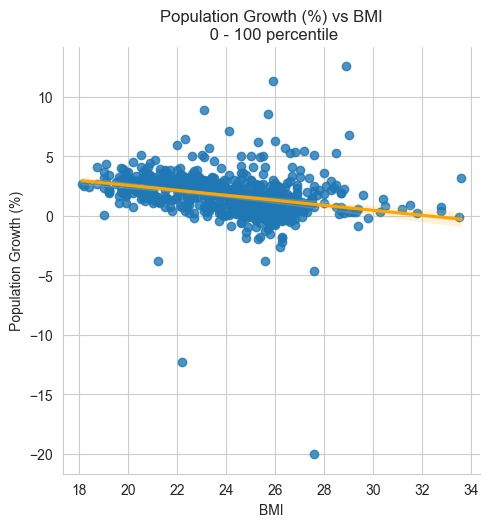

In [48]:
plot_scatter('BMI','Population Growth (%)',reduce_factor=10,regression=True)

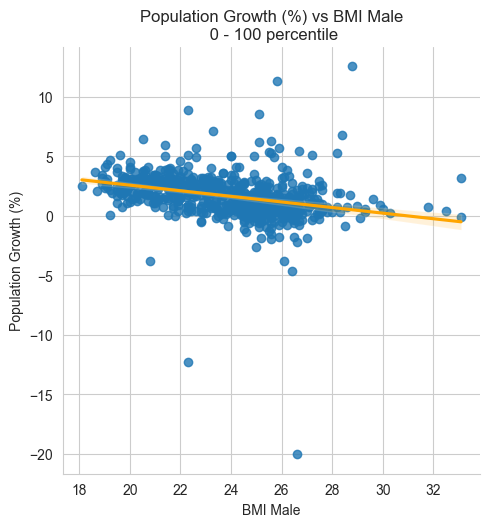

In [49]:
plot_scatter('BMI Male','Population Growth (%)',reduce_factor=10,regression=True)

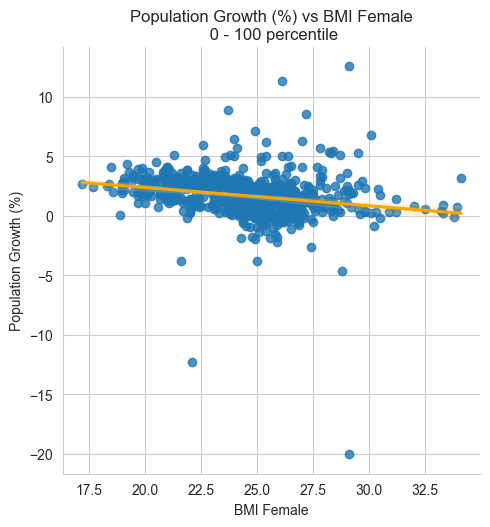

In [50]:
plot_scatter('BMI Female','Population Growth (%)',reduce_factor=10,regression=True)

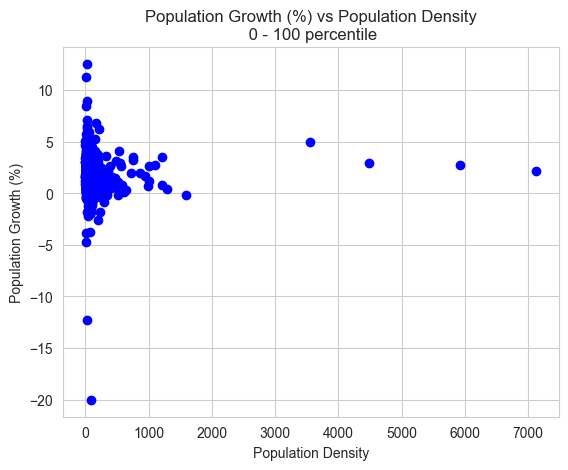

In [51]:
plot_scatter('Population Density','Population Growth (%)',reduce_factor=10)

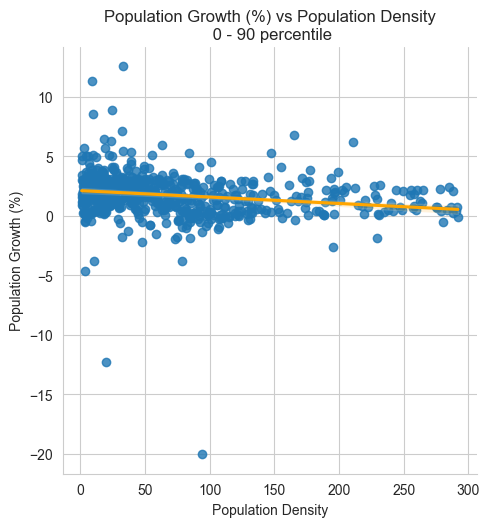

In [52]:
plot_scatter('Population Density','Population Growth (%)',reduce_factor=10,upper_percentile=90,regression=True)

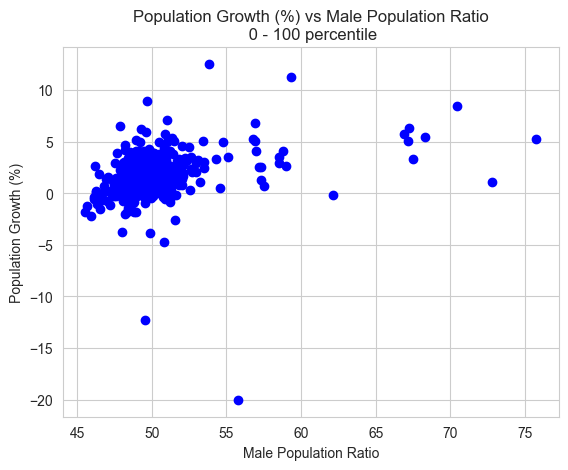

In [53]:
plot_scatter('Male Population Ratio','Population Growth (%)',reduce_factor=10)

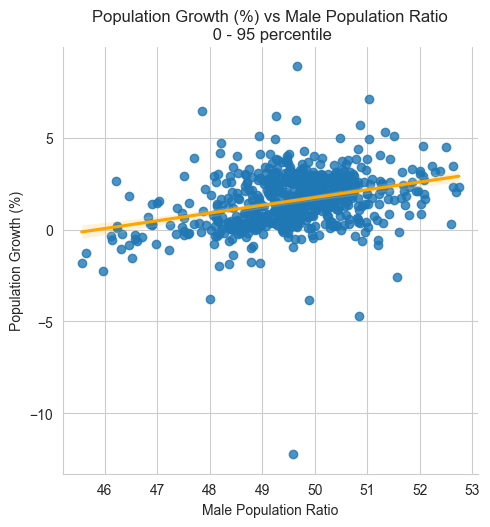

In [54]:
plot_scatter('Male Population Ratio','Population Growth (%)',reduce_factor=10,upper_percentile=95,regression=True)

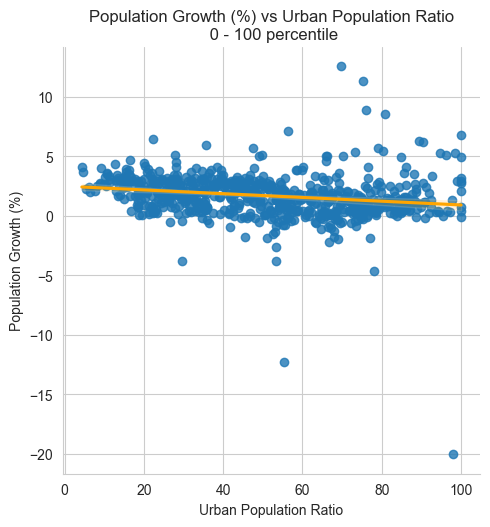

In [55]:
plot_scatter('Urban Population Ratio','Population Growth (%)',reduce_factor=10,regression=True)

In [56]:
corr_matrix = data.drop(columns=["Country","SDG Region"]).corr()

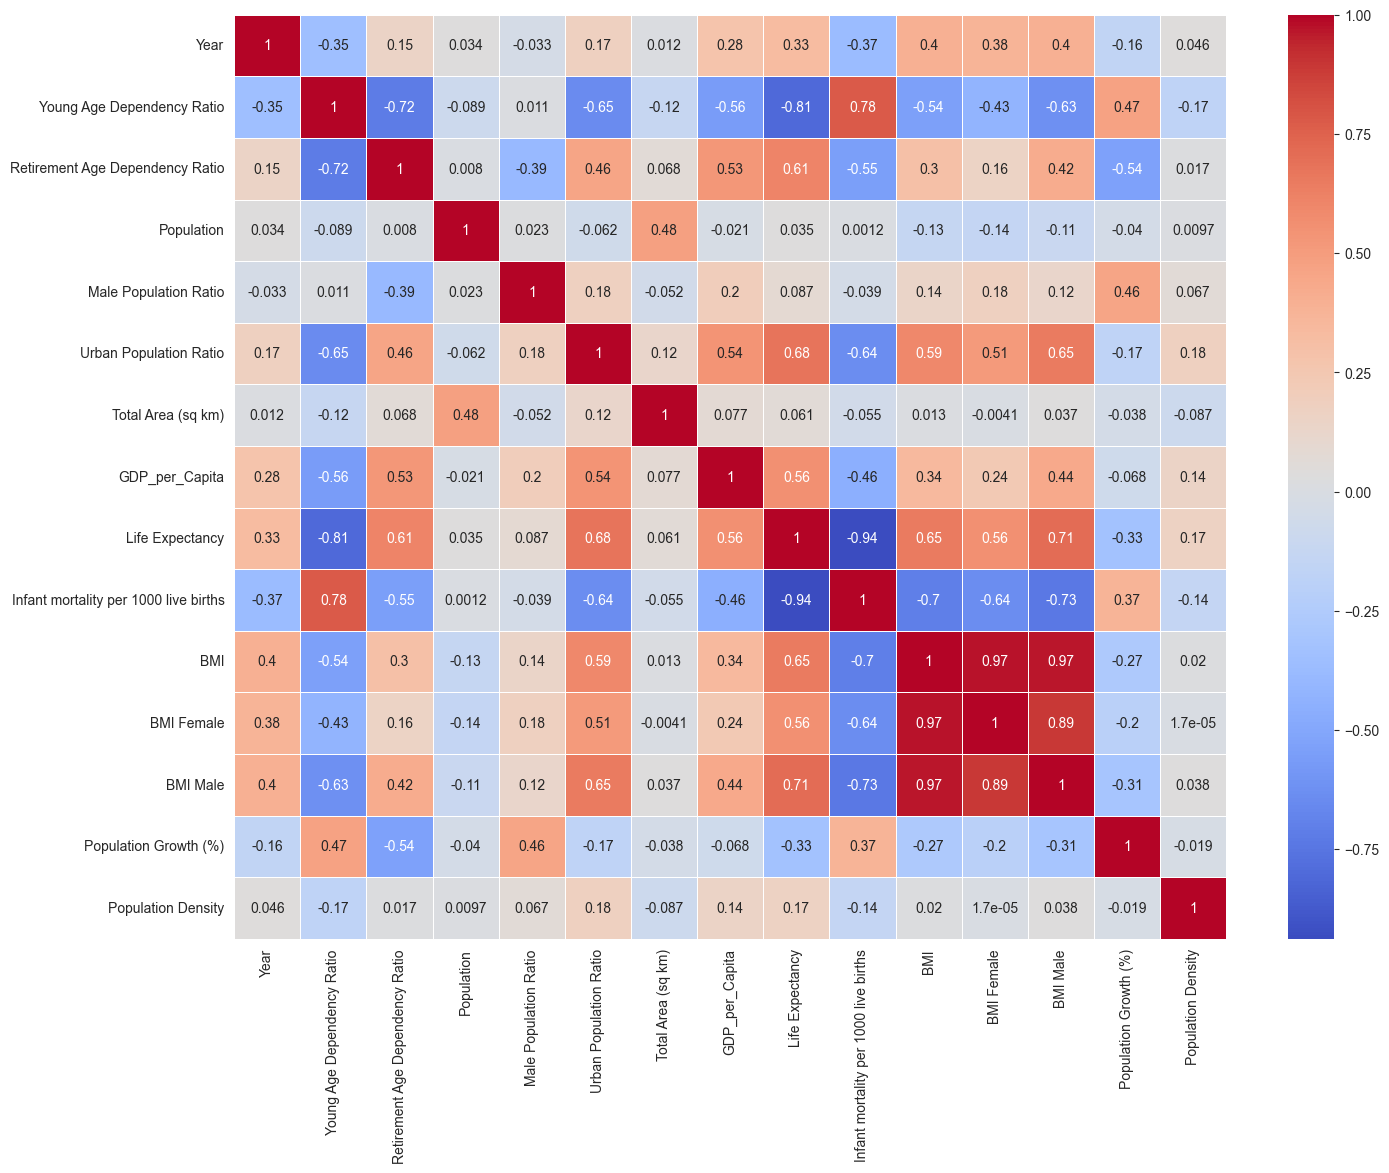

In [57]:
plt.figure(figsize=(16, 12))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

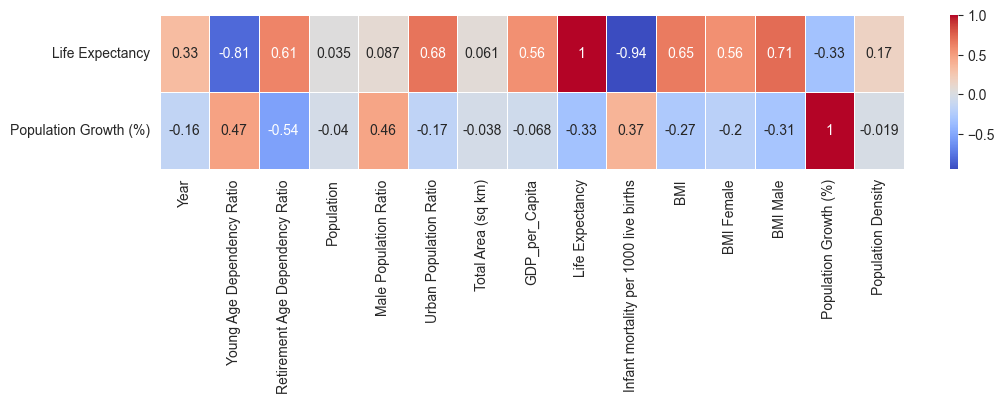

In [58]:
plt.figure(figsize=(12, 2))
sns.heatmap(corr_matrix[["Life Expectancy","Population Growth (%)"]].T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [59]:
data.columns

Index(['Country', 'Year', 'Young Age Dependency Ratio',
       'Retirement Age Dependency Ratio', 'SDG Region', 'Population',
       'Male Population Ratio', 'Urban Population Ratio', 'Total Area (sq km)',
       'GDP_per_Capita', 'Life Expectancy',
       'Infant mortality per 1000 live births', 'BMI', 'BMI Female',
       'BMI Male', 'Population Growth (%)', 'Population Density'],
      dtype='object')

In [60]:
def detect_outliers_by_mean(data, column, threshold=3):
    mean = data[column].mean()
    std_dev = data[column].std()
    upper_bound = mean + threshold * std_dev
    lower_bound = mean - threshold * std_dev
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    return outliers, upper_bound, lower_bound

In [61]:
numeric_columns = ['Young Age Dependency Ratio',
       'Retirement Age Dependency Ratio',
       'Male Population Ratio', 'Urban Population Ratio',
       'GDP_per_Capita', 'Life Expectancy',
       'Infant mortality per 1000 live births', 'BMI', 'BMI Female',
       'BMI Male', 'Population Growth (%)', 'Population Density']

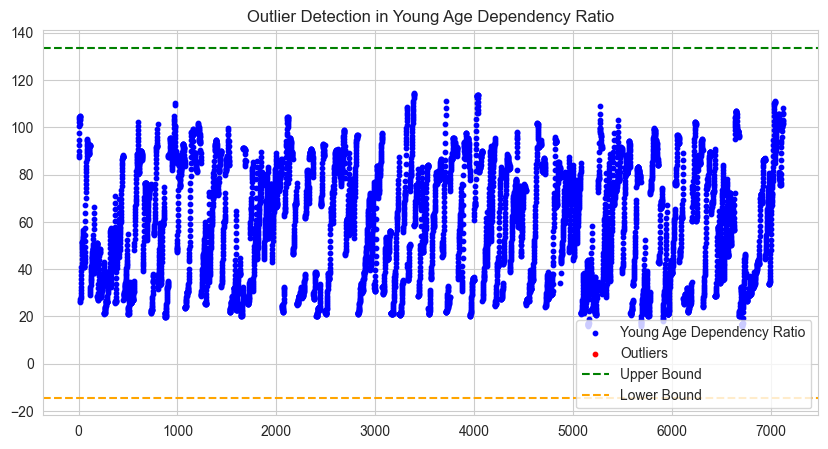

Empty DataFrame
Columns: [Country, Year, Young Age Dependency Ratio]
Index: []


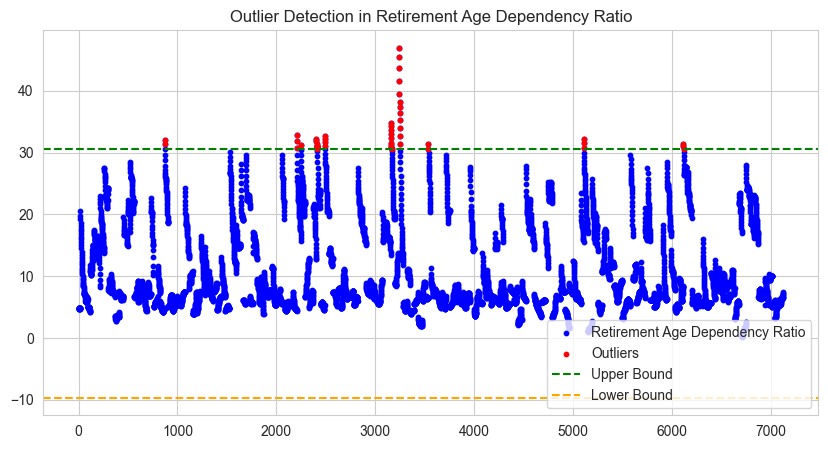

       Country  Year  Retirement Age Dependency Ratio
871   Bulgaria  2015                        31.366091
870   Bulgaria  2016                        32.101284
2209   Finland  2014                        30.758145
2208   Finland  2015                        31.855225
2207   Finland  2016                        32.813686
2249    France  2016                        31.294368
2413   Germany  2008                        30.595755
2412   Germany  2009                        30.970903
2411   Germany  2010                        31.016015
2410   Germany  2011                        30.867269
2409   Germany  2012                        30.910304
2408   Germany  2013                        31.086938
2407   Germany  2014                        31.408774
2406   Germany  2015                        31.817933
2405   Germany  2016                        32.222314
2492    Greece  2013                        31.081309
2491    Greece  2014                        31.639875
2490    Greece  2015        

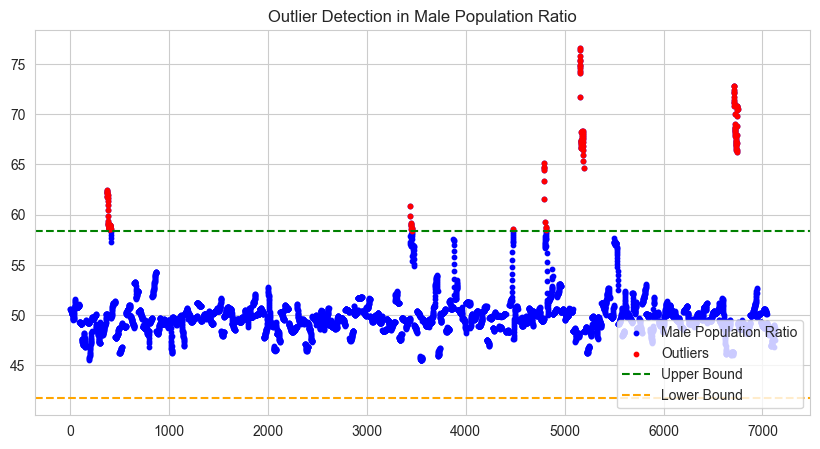

                   Country  Year  Male Population Ratio
407                Bahrain  1979              58.568721
406                Bahrain  1980              58.811346
405                Bahrain  1981              58.948414
404                Bahrain  1982              58.961631
403                Bahrain  1983              58.935895
...                    ...   ...                    ...
6712  United Arab Emirates  2012              72.064609
6711  United Arab Emirates  2013              71.718861
6710  United Arab Emirates  2014              71.387619
6709  United Arab Emirates  2015              71.072399
6708  United Arab Emirates  2016              70.774693

[143 rows x 3 columns]


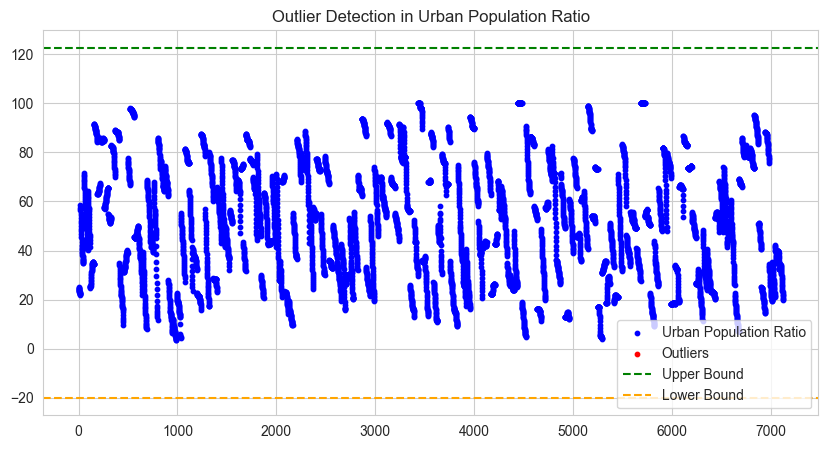

Empty DataFrame
Columns: [Country, Year, Urban Population Ratio]
Index: []


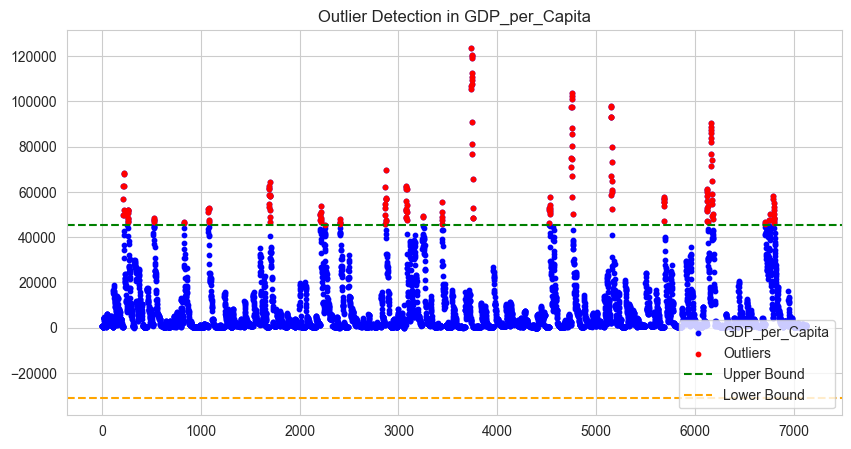

            Country  Year  GDP_per_Capita
225       Australia  2008    49701.281784
223       Australia  2010    52147.024194
222       Australia  2011    62609.660716
221       Australia  2012    68078.044228
220       Australia  2013    68198.419345
...             ...   ...             ...
6796  United States  2012    51784.411469
6795  United States  2013    53409.750777
6794  United States  2014    55304.315532
6793  United States  2015    57040.208214
6792  United States  2016    58206.614193

[187 rows x 3 columns]


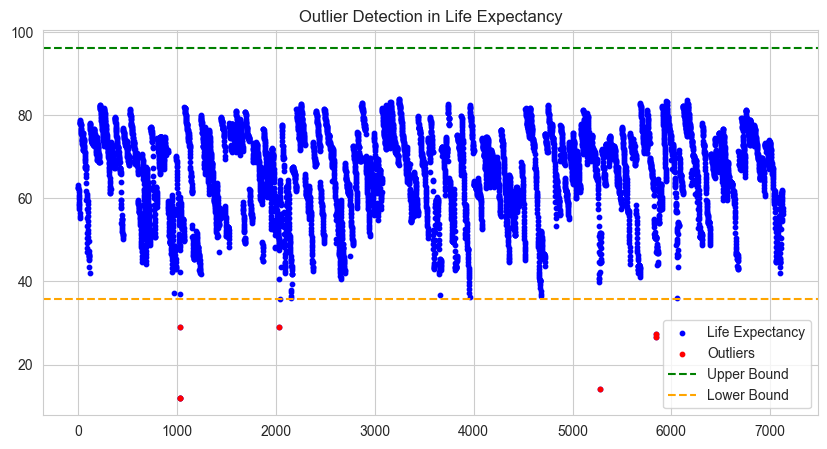

                Country  Year  Life Expectancy
1032           Cambodia  1975           11.995
1031           Cambodia  1976           12.013
1030           Cambodia  1977           28.910
2036  Equatorial Guinea  1976           28.921
5273             Rwanda  1994           14.098
5848            Somalia  1991           26.565
5847            Somalia  1992           27.312


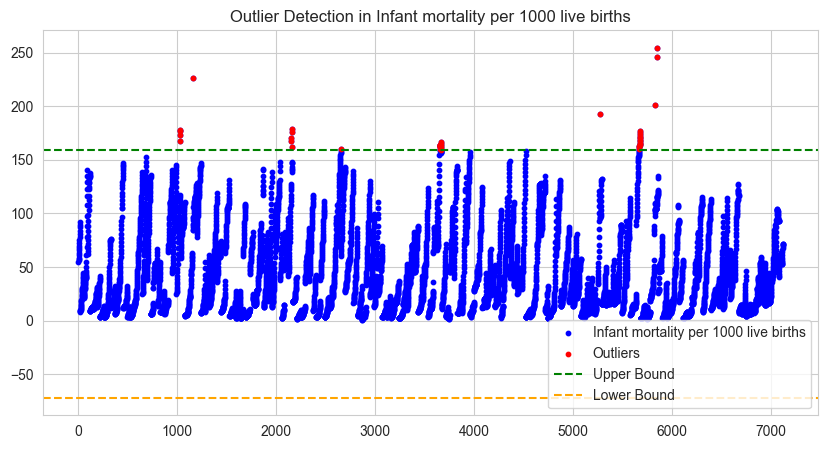

                       Country  Year  Infant mortality per 1000 live births
1032                  Cambodia  1975                               167.6076
1031                  Cambodia  1976                               176.3624
1030                  Cambodia  1977                               177.4197
1029                  Cambodia  1978                               172.8389
1161  Central African Republic  2009                               226.3720
2164                  Ethiopia  1975                               162.1591
2156                  Ethiopia  1983                               178.7399
2155                  Ethiopia  1984                               176.1721
2154                  Ethiopia  1985                               170.4932
2153                  Ethiopia  1986                               167.1521
2654                    Guinea  1975                               160.1907
3672                   Liberia  1975                               166.3368
3671        

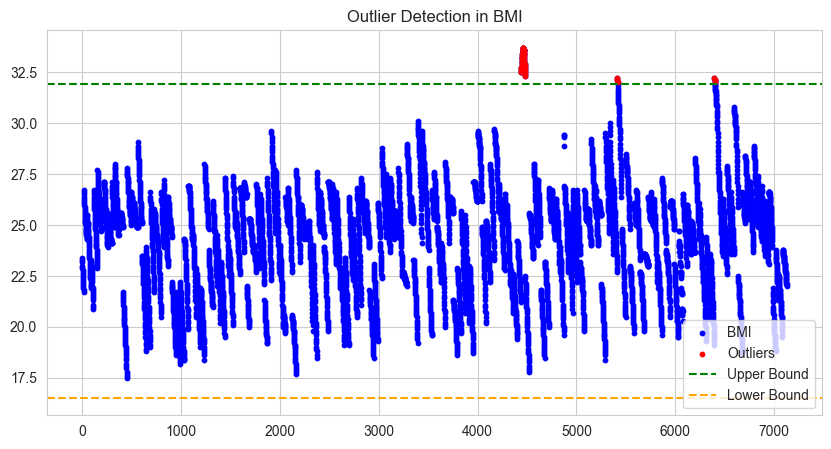

     Country  Year   BMI
4481   Nauru  1975  32.3
4480   Nauru  1976  32.4
4479   Nauru  1977  32.5
4478   Nauru  1978  32.6
4477   Nauru  1979  32.7
4476   Nauru  1980  32.8
4475   Nauru  1981  32.9
4474   Nauru  1982  33.0
4473   Nauru  1983  33.1
4472   Nauru  1984  33.2
4471   Nauru  1985  33.3
4470   Nauru  1986  33.4
4469   Nauru  1987  33.4
4468   Nauru  1988  33.5
4467   Nauru  1989  33.6
4466   Nauru  1990  33.6
4465   Nauru  1991  33.6
4464   Nauru  1992  33.7
4463   Nauru  1993  33.7
4462   Nauru  1994  33.7
4461   Nauru  1995  33.7
4460   Nauru  1996  33.6
4459   Nauru  1997  33.6
4458   Nauru  1998  33.6
4457   Nauru  1999  33.5
4456   Nauru  2000  33.5
4455   Nauru  2001  33.4
4454   Nauru  2002  33.4
4453   Nauru  2003  33.3
4452   Nauru  2004  33.2
4451   Nauru  2005  33.2
4450   Nauru  2006  33.1
4449   Nauru  2007  33.0
4448   Nauru  2008  33.0
4447   Nauru  2009  32.9
4446   Nauru  2010  32.8
4445   Nauru  2011  32.8
4444   Nauru  2012  32.7
4443   Nauru  2013  32.7


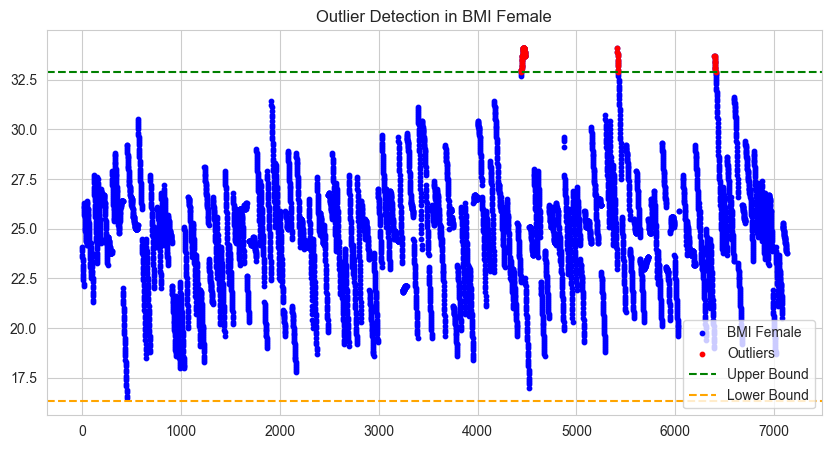

     Country  Year  BMI Female
4481   Nauru  1975        33.7
4480   Nauru  1976        33.7
4479   Nauru  1977        33.7
4478   Nauru  1978        33.8
4477   Nauru  1979        33.8
...      ...   ...         ...
6400   Tonga  2012        33.4
6399   Tonga  2013        33.5
6398   Tonga  2014        33.6
6397   Tonga  2015        33.7
6396   Tonga  2016        33.7

[62 rows x 3 columns]


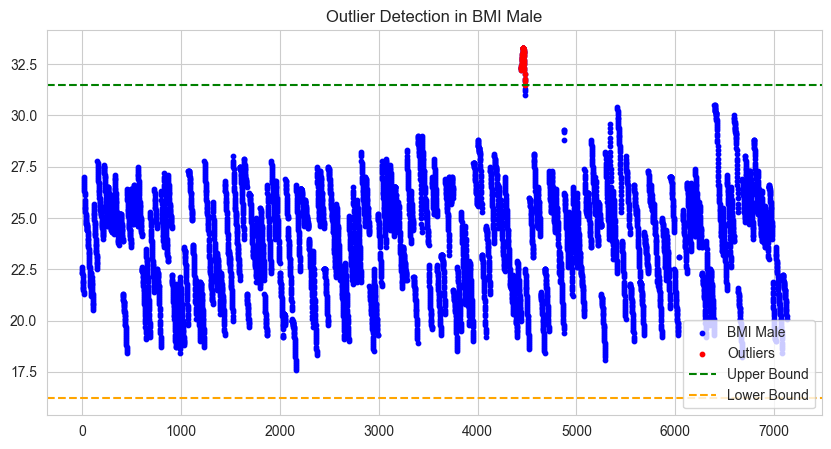

     Country  Year  BMI Male
4478   Nauru  1978      31.5
4477   Nauru  1979      31.7
4476   Nauru  1980      31.8
4475   Nauru  1981      32.0
4474   Nauru  1982      32.2
4473   Nauru  1983      32.3
4472   Nauru  1984      32.5
4471   Nauru  1985      32.6
4470   Nauru  1986      32.7
4469   Nauru  1987      32.9
4468   Nauru  1988      33.0
4467   Nauru  1989      33.1
4466   Nauru  1990      33.1
4465   Nauru  1991      33.2
4464   Nauru  1992      33.3
4463   Nauru  1993      33.3
4462   Nauru  1994      33.3
4461   Nauru  1995      33.3
4460   Nauru  1996      33.3
4459   Nauru  1997      33.3
4458   Nauru  1998      33.2
4457   Nauru  1999      33.2
4456   Nauru  2000      33.1
4455   Nauru  2001      33.1
4454   Nauru  2002      33.0
4453   Nauru  2003      32.9
4452   Nauru  2004      32.8
4451   Nauru  2005      32.8
4450   Nauru  2006      32.7
4449   Nauru  2007      32.7
4448   Nauru  2008      32.6
4447   Nauru  2009      32.5
4446   Nauru  2010      32.5
4445   Nauru  

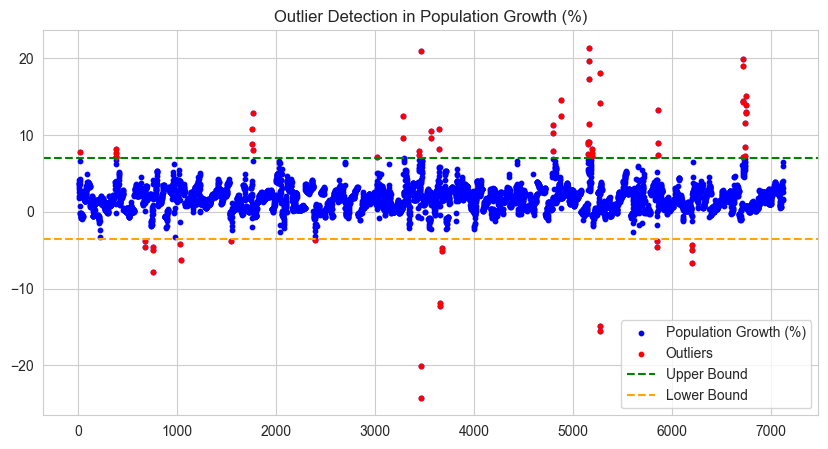

                   Country  Year  Population Growth (%)
14             Afghanistan  2002               7.832638
383                Bahrain  2003               7.092139
382                Bahrain  2004               8.215240
381                Bahrain  2005               7.656990
380                Bahrain  2006               7.162962
...                    ...   ...                    ...
6720  United Arab Emirates  2004               7.203345
6719  United Arab Emirates  2005              14.434992
6718  United Arab Emirates  2006              19.875059
6717  United Arab Emirates  2007              19.004469
6716  United Arab Emirates  2008              14.365492

[74 rows x 3 columns]


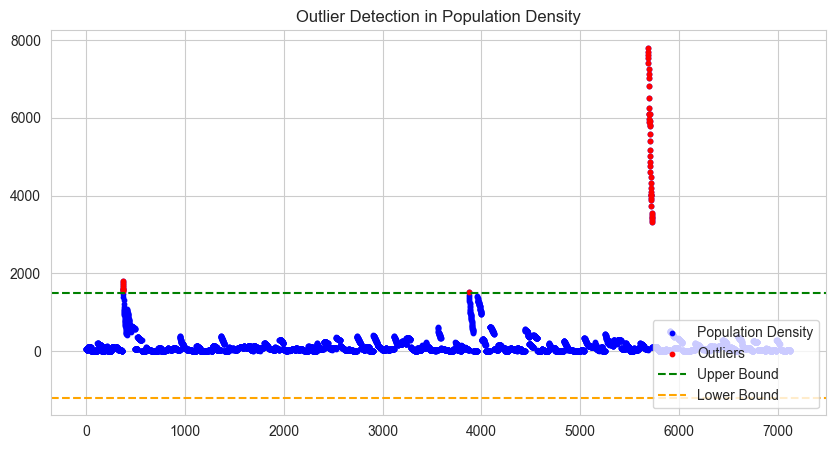

        Country  Year  Population Density
377     Bahrain  2009         1551.911842
376     Bahrain  2010         1592.709974
375     Bahrain  2011         1580.282920
374     Bahrain  2012         1590.829870
373     Bahrain  2013         1638.536364
372     Bahrain  2014         1700.562905
371     Bahrain  2015         1750.825193
370     Bahrain  2016         1809.577664
3875   Maldives  2016         1514.173333
5726  Singapore  1975         3327.352941
5725  Singapore  1976         3372.500000
5724  Singapore  1977         3419.558824
5723  Singapore  1978         3461.176471
5722  Singapore  1979         3505.147059
5721  Singapore  1980         3549.919118
5720  Singapore  1981         3724.757353
5719  Singapore  1982         3891.861765
5718  Singapore  1983         3942.736765
5717  Singapore  1984         4017.972059
5716  Singapore  1985         4023.466176
5715  Singapore  1986         4019.666176
5714  Singapore  1987         4080.572059
5713  Singapore  1988         4185

In [62]:
for column in numeric_columns:
    outliers, upper_bound, lower_bound = detect_outliers_by_mean(data, column)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(data.index, data[column], color='blue', label=f'{column}', s=10)
    ax.scatter(outliers.index, outliers[column], color='red', label='Outliers', s=10)
    ax.axhline(y=upper_bound, color='green', linestyle='--', label=f'Upper Bound')
    ax.axhline(y=lower_bound, color='orange', linestyle='--', label=f'Lower Bound')
    ax.set_title(f'Outlier Detection in {column}')
    ax.legend(loc='lower right', fontsize=10)
    plt.show()
    print(outliers[['Country','Year',column]])


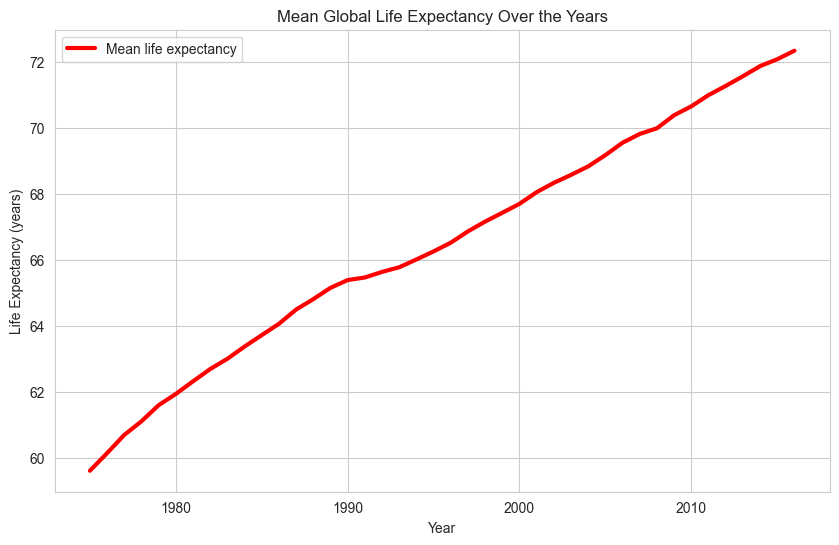

In [63]:
data['Weighted Life Expectancy'] = data['Life Expectancy'] * data['Population']
yearly_data_global = data.groupby('Year').agg(
    total_weighted_life_expectancy=('Weighted Life Expectancy', 'sum'),
    total_population=('Population', 'sum')
)
yearly_data_global['Global Life Expectancy'] = yearly_data_global['total_weighted_life_expectancy'] / yearly_data_global['total_population']

plt.figure(figsize=(10,6))
plt.plot(yearly_data_global.index, yearly_data_global['Global Life Expectancy'], color = "r", label = "Mean life expectancy",linewidth = 3)
plt.title('Mean Global Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend()

plt.show()

In [64]:
sdg_regions = data['SDG Region'].unique()
sdg_regions

array(['Central and Southern Asia', 'Europe and Northern America',
       'Northern Africa and Western Asia', 'Sub-Saharan Africa',
       'Latin America and the Caribbean', 'Australia and New Zealand',
       'Eastern and South-Eastern Asia', 'Oceania'], dtype=object)

In [65]:
unique_styles = {
    'Central and Southern Asia': ('cyan', '--'),
    'Europe and Northern America': ('yellow', '-.'),
    'Northern Africa and Western Asia': ('green', ':'),
    'Sub-Saharan Africa': ('brown', '-'),
    'Latin America and the Caribbean': ('orange', '--'),
    'Australia and New Zealand': ('violet', '-.'),
    'Eastern and South-Eastern Asia': ('blue', ':'),
    'Oceania': ('black', '-'),
}

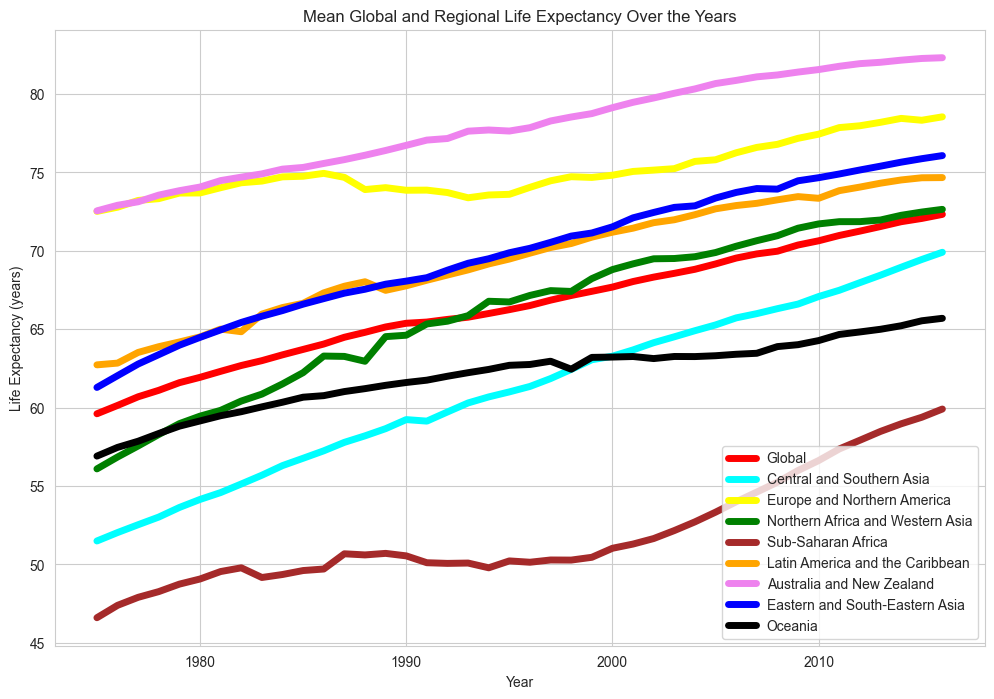

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(yearly_data_global.index, yearly_data_global['Global Life Expectancy'], color='r', label='Global',linewidth = 5)
for region, (color, linestyle) in unique_styles.items():
    region_data = data[data['SDG Region'] == region]
    yearly_data_region = region_data.groupby('Year').agg(
        total_weighted_life_expectancy=('Weighted Life Expectancy', 'sum'),
        total_population=('Population', 'sum')
    )  
    yearly_data_region['Regional Life Expectancy'] = yearly_data_region['total_weighted_life_expectancy'] / yearly_data_region['total_population']
    plt.plot(yearly_data_region.index, yearly_data_region['Regional Life Expectancy'], color=color, label=region, linewidth=5)
plt.title('Mean Global and Regional Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend()
plt.show()


In [67]:
fig = px.choropleth(
    data.sort_values(by="Year",ascending=True), 
    locations="Country", 
    locationmode="country names",
    color="Life Expectancy", 
    hover_name="Country", 
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Life Expectancy by Country over the years",
    labels={'Life Expectancy': 'Life Expectancy'},
    range_color=(data['Life Expectancy'].min(), data['Life Expectancy'].max())
)

fig.update_layout(
    width=900,
    height=800,
    title_font_size=24,
)
fig.show()

In [79]:
fig = px.choropleth(
    data.sort_values(by="Year",ascending=True), 
    locations="Country", 
    locationmode="country names",
    color="Population", 
    hover_name="Country", 
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Reds,
    title="Population by Country over the years",
    labels={'Population ': 'Population'},
    range_color=(data['Population'].min(), data['Population'].quantile(0.95))
)

fig.update_layout(
    width=900,
    height=800,
    title_font_size=24,
)
fig.show()

In [75]:
fig = px.choropleth(
    data.sort_values(by="Year",ascending=True), 
    locations="Country", 
    locationmode="country names",
    color="Population Density", 
    hover_name="Country", 
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Population Density by Country over the years",
    labels={'Population Density': 'Population Density'},
    range_color=(data['Population Density'].min(), data['Population Density'].quantile(0.80))
)

fig.update_layout(
    width=900,
    height=800,
    title_font_size=24,
)
fig.show()